In [1]:
"""
SEE: https://github.com/sudoswap/lssvm/blob/main/src/LSSVMPair.sol
Events to query for are:
  1. SwapNFTInPair()
    - emitted by LSSVMPair.swapNFTsForToken()  (sell order)
    - has no data so need to look at Transfer event for volume
  2. SwapNFTOutPair()
    - emitted by LSSVMPair.swapTokenForAnyNFTs() (buy order)
    - has no data so need to look at Transfer event for volume
  3. SpotPriceUpdate(uint128 newSpotPrice)
    - emitted by LSSVMPair on spot price changes: use to track price changes
"""
# switch to sudo-ape wd first for ape project to work properly
import os
from pathlib import Path

if Path(*Path(os.getcwd()).parts[-2:]) == Path('sudo-ape/notebook'):
    os.chdir('..')

In [3]:
import pandas as pd
import typing as tp

from ape import accounts, chain, Contract, networks, project

In [4]:
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [5]:
project.LSSVMPair

<LSSVMPair>

In [6]:
current_block = chain.blocks[-1].number
current_block

15562955

In [7]:
start_block = 14645816  # pair factory deployment
start_block

14645816

In [8]:
sudo_router = Contract("0x2B2e8cDA09bBA9660dCA5cB6233787738Ad68329")
sudo_router

<LSSVMRouter 0x2B2e8cDA09bBA9660dCA5cB6233787738Ad68329>

In [9]:
sudo_factory = Contract("0xb16c1342E617A5B6E4b631EB114483FDB289c0A4")
sudo_factory

<LSSVMPairFactory 0xb16c1342E617A5B6E4b631EB114483FDB289c0A4>

In [10]:
sudo_factory.NewPair

NewPair(address poolAddress)

In [11]:
# use address of top xmons pool to check is pool thru factory
sudo_factory.isPair("0x5caf332dca4e6c9e69d52f320c21e74845353db0", 0)

True

In [12]:
sudo_pair_xmons = Contract("0x5caf332dca4e6c9e69d52f320c21e74845353db0")
sudo_pair_xmons

<LSSVMPair 0x5caF332DcA4e6C9E69d52F320c21e74845353db0>

In [13]:
# TRADE pool type
sudo_pair_xmons.poolType()

2

In [14]:
sudo_pair_xmons.SpotPriceUpdate

SpotPriceUpdate(uint128 newSpotPrice)

In [15]:
# get start block from query_pairs IF query can't handle when start_block < contract creation block (it can, woot)
%time query_prices_xmons = sudo_pair_xmons.SpotPriceUpdate.query('*', start_block=start_block)
query_prices_xmons

INFO: Cache database has not been initialized
CPU times: user 29.5 s, sys: 3.99 s, total: 33.5 s
Wall time: 5min 27s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 9077669902912621000},0x195069bfc2a5e1ee78ee3cd8114fdfce8c0d482036d3...,15198846,0xd3b29ce639c43280c2a194b638e07a5e1541824210aa...,54,37
1,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 11577669902912621000},0xe6d9db380c0b7b3d9923ac18e1a920c64a60ef0e2f2e...,15199800,0x420f1997f04b486a8ed114b32337abb0f8722e82ef1f...,79,82
2,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 14077669902912621000},0x85212d1b00c2c505bda6b7a56d2b1f2a893646a0d55b...,15203036,0x0e89e72ff162aa1b1ec18cdad70825885d7c0884f425...,233,138
3,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 11577669902912621000},0x414ea41198833a399a68c9b66456047bc6dd349330d7...,15208415,0x36dce9b484abf8db83699dabf5d63cbca4b9f68cc7e2...,120,56
4,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 9077669902912621000},0x28758b8d0ad21047a93b75089e210e0ca85f652842ef...,15218330,0x10112e7b56853191c7e46d36f0cca7431be567982f5c...,73,59
...,...,...,...,...,...,...,...,...
61,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 17330097087378640000},0x2946f9b515e1b1144a2a2a7de75e111bdc1700485e16...,15460128,0xbe6bdd7ff1c6ead20430c3ca591031e3cab7165b492d...,79,52
62,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 14830097087378640000},0xc5dd46e77a6a15f76f76b34bebc89c57a0a7436febb7...,15460372,0x46a34b7810110fe9171b49155170a0a8af02658675e5...,190,127
63,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 17330097087378640000},0x15592fc9f37ff3366ca8cec45612d9b4dc6eec6b76ac...,15462678,0xa641413250e702a7032da1803bd91a6a9095ab11e9ec...,58,37
64,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 14830097087378640000},0xe920b32111dc1c0691333c4880b495a944560a181646...,15487756,0xc545a2b6d360c6653972c1b1a52b1d90d7f59bcb9246...,52,81


In [17]:
# utility functions to unfold event arguments into separate columns
def unfold_event_args(key: str, event_args: dict) -> tp.Any:
    return event_args[key]

def unfold(df: pd.DataFrame):
    for key in df.iloc[-1]['event_arguments'].keys():
        df[key] = df['event_arguments'].apply(lambda ev: unfold_event_args(key, ev))

In [18]:
unfold(query_prices_xmons)

In [19]:
# only 64 price updates for this pool over the last 44 days since deployed (not much)
query_prices_xmons

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,newSpotPrice
0,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 9077669902912621000},0x195069bfc2a5e1ee78ee3cd8114fdfce8c0d482036d3...,15198846,0xd3b29ce639c43280c2a194b638e07a5e1541824210aa...,54,37,9077669902912621000
1,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 11577669902912621000},0xe6d9db380c0b7b3d9923ac18e1a920c64a60ef0e2f2e...,15199800,0x420f1997f04b486a8ed114b32337abb0f8722e82ef1f...,79,82,11577669902912621000
2,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 14077669902912621000},0x85212d1b00c2c505bda6b7a56d2b1f2a893646a0d55b...,15203036,0x0e89e72ff162aa1b1ec18cdad70825885d7c0884f425...,233,138,14077669902912621000
3,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 11577669902912621000},0x414ea41198833a399a68c9b66456047bc6dd349330d7...,15208415,0x36dce9b484abf8db83699dabf5d63cbca4b9f68cc7e2...,120,56,11577669902912621000
4,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 9077669902912621000},0x28758b8d0ad21047a93b75089e210e0ca85f652842ef...,15218330,0x10112e7b56853191c7e46d36f0cca7431be567982f5c...,73,59,9077669902912621000
...,...,...,...,...,...,...,...,...,...
61,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 17330097087378640000},0x2946f9b515e1b1144a2a2a7de75e111bdc1700485e16...,15460128,0xbe6bdd7ff1c6ead20430c3ca591031e3cab7165b492d...,79,52,17330097087378640000
62,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 14830097087378640000},0xc5dd46e77a6a15f76f76b34bebc89c57a0a7436febb7...,15460372,0x46a34b7810110fe9171b49155170a0a8af02658675e5...,190,127,14830097087378640000
63,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 17330097087378640000},0x15592fc9f37ff3366ca8cec45612d9b4dc6eec6b76ac...,15462678,0xa641413250e702a7032da1803bd91a6a9095ab11e9ec...,58,37,17330097087378640000
64,SpotPriceUpdate,0x5caF332DcA4e6C9E69d52F320c21e74845353db0,{'newSpotPrice': 14830097087378640000},0xe920b32111dc1c0691333c4880b495a944560a181646...,15487756,0xc545a2b6d360c6653972c1b1a52b1d90d7f59bcb9246...,52,81,14830097087378640000


<AxesSubplot:xlabel='block_number', ylabel='newSpotPrice'>

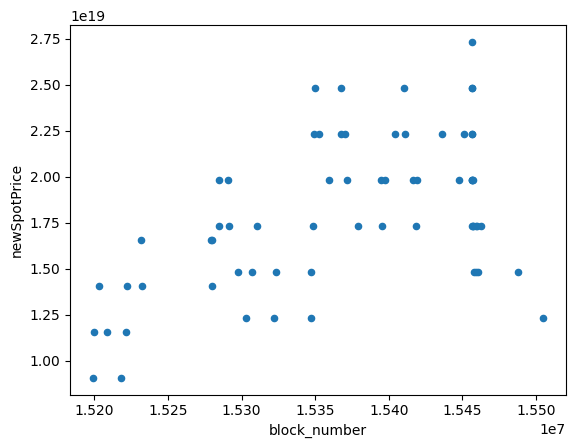

In [20]:
query_prices_xmons.plot(x='block_number', y='newSpotPrice', kind='scatter')